# ***Engr.Muhammad Javed***

## **Lasso Regularization:**

## *Importing Required Libraries*


In [43]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , StandardScaler , FunctionTransformer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression , Lasso , Ridge
from sklearn.metrics import confusion_matrix, classification_report , mean_absolute_error , mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

## *Loading the Dataset*


In [2]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Housing.csv")

## *Show Dataset*


In [3]:
Dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## *Checking for Missing Values in the Dataset*


In [4]:
Dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## *Viewing Statistical Summary of the Dataset*


In [6]:
Dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## *Checking Dataset Information*


In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## *Dropping Unnecessary Columns from Dataset*


In [11]:
Dataset.drop(["id" ,"date" , "grade" , "zipcode" , "lat" ,  "long" , "sqft_living15" , "sqft_lot15" ] , axis = 1 , inplace = True)

In [12]:
Dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0


## *Check whether Lasso regularization is applied or not.*

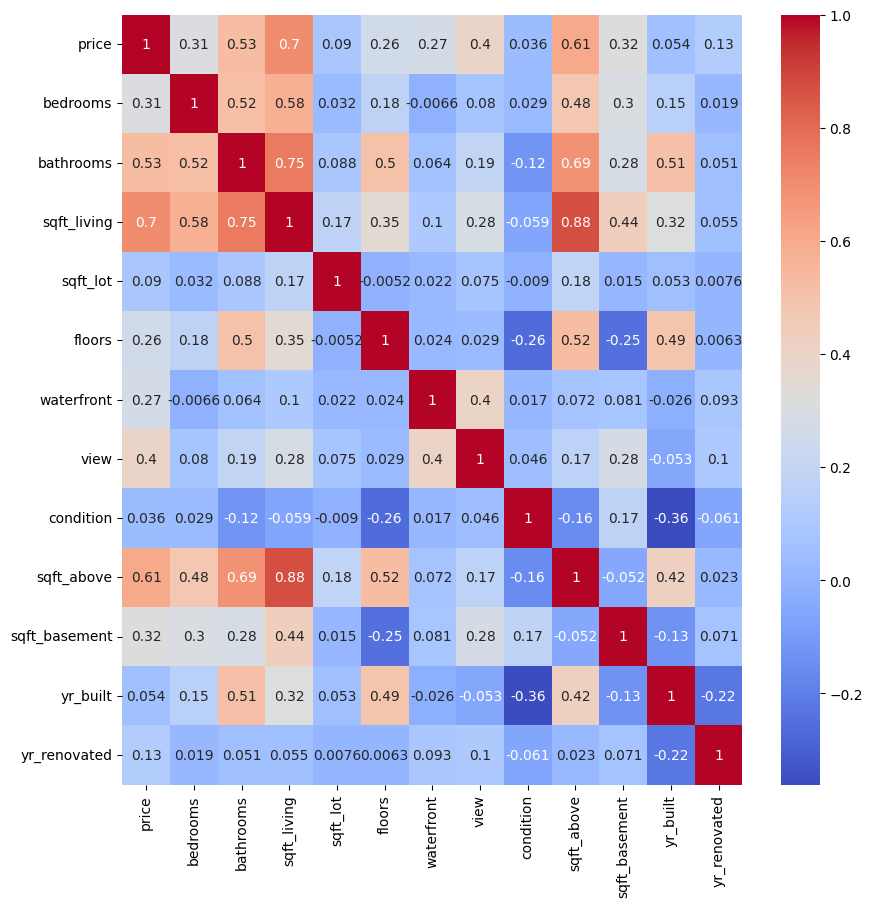

In [13]:
plt.figure(figsize=(10,10))

sn.heatmap(data = Dataset.corr() , annot = True , cmap ="coolwarm" )
plt.show()

In [14]:
Dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## *Splitting Features and target Variable*


In [16]:
x = Dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]
y = Dataset["price"]

## *Standardizing Feature Data*


In [20]:
sc = StandardScaler()
sc.fit(x)
X= pd.DataFrame(sc.transform(x) , columns= x.columns)

In [21]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-1.473841,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398669,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473841,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676503,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398669,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398669,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,-0.312039,-0.658681,1.293542,-0.210128
21609,0.676503,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.629908,-0.658681,1.463768,-0.210128
21610,-1.473841,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.927928,-0.658681,1.293542,-0.210128
21611,-0.398669,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,-0.227505,-0.658681,1.123316,-0.210128


## *Splitting Dataset into Training and Testing Sets*


In [23]:
X_train , X_test , Y_train , Y_test = train_test_split(X , y , random_state=42 , test_size=0.2)


## **Linear Regression**

In [26]:
Lr = LinearRegression()
Lr.fit(X_train , Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## *Calculating Regression Error Metrics for Logistic Regression*


In [45]:
print(mean_squared_error(Y_test , Lr.predict(X_test)))
print(mean_absolute_error(Y_test , Lr.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test , Lr.predict(X_test))))

60651928701.7925
158277.11204656793
246276.12288200515


In [28]:
Lr.score(X_test , Y_test)*100

59.880111297339276

In [30]:
Lr.coef_

array([-51404.41192683,  50470.91377582, 128798.5720784 , -15227.01154516,
        24780.65151746,  43709.28935693,  47826.43502124,  10953.72977996,
       117873.58327064,  46735.18222578, -85512.18525689,   4745.81932239])

## *Visualizing Logistic Regression Coefficients*


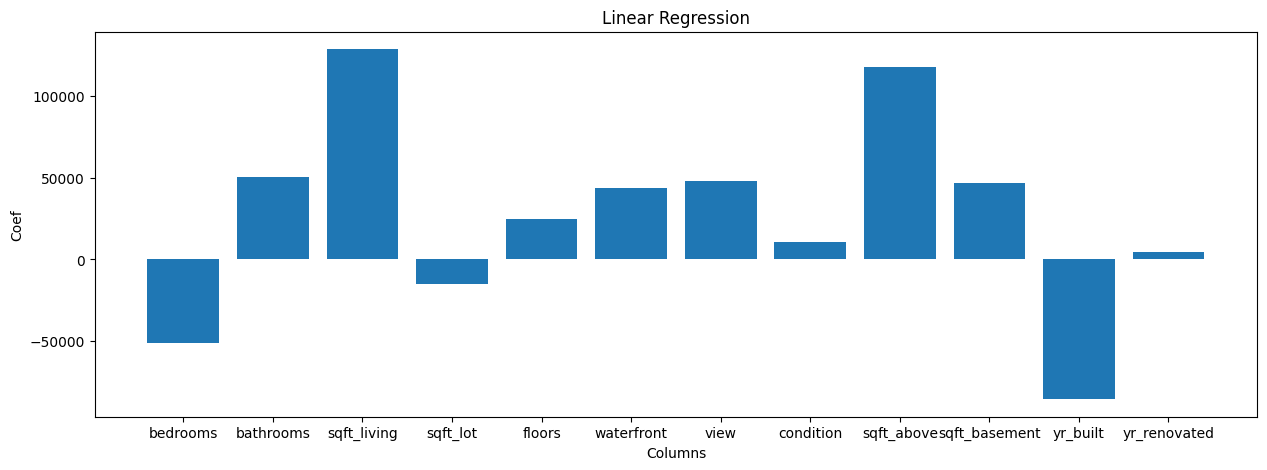

In [36]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , Lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

## **Lasso**

In [38]:
La = Lasso(alpha= 0.5)
La.fit(X_train , Y_train)
La.score(X_test , Y_test)*100

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


59.88012233751449

## *Calculating Regression Error Metrics for Lasso Regularization*


In [46]:
print(mean_squared_error(Y_test , La.predict(X_test)))
print(mean_absolute_error(Y_test , La.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test , La.predict(X_test))))

60651912011.6186
158277.14036440244
246276.08899691948


## *Visualizing Lasso Regression Coefficients*


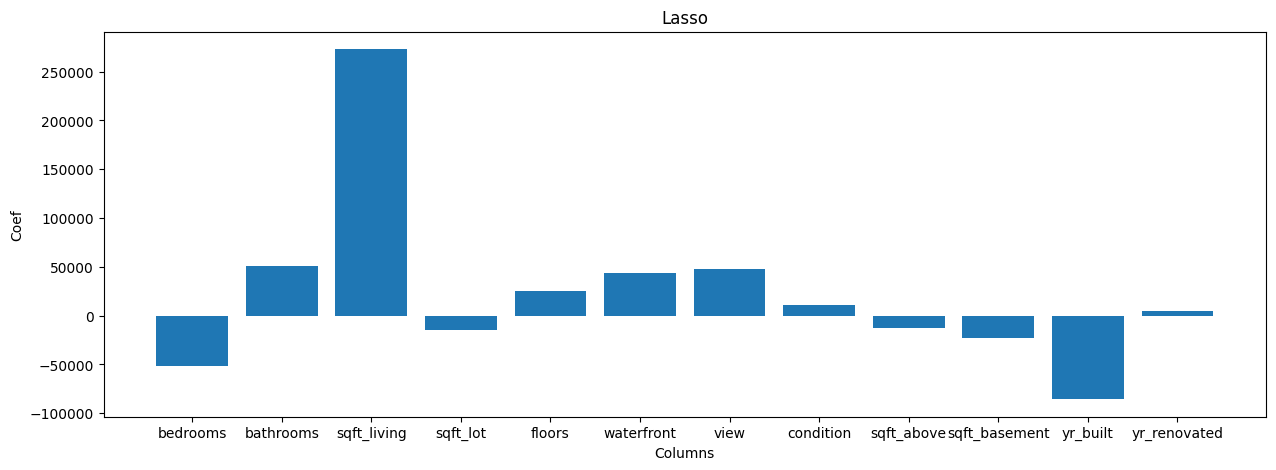

In [40]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , La.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

## **Ridge**

In [41]:
ri = Ridge(alpha= 10)
ri.fit(X_train , Y_train)
ri.score(X_test , Y_test)*100

59.87968836897315

## *Calculating Regression Error Metrics for Ridge Regression*



In [47]:
print(mean_squared_error(Y_test , ri.predict(X_test)))
print(mean_absolute_error(Y_test , ri.predict(X_test)))
print(np.sqrt(mean_squared_error(Y_test , ri.predict(X_test))))

60652568070.991615
158264.4841813291
246277.42095245275


## *Visualizing Lasso Regression Coefficients*


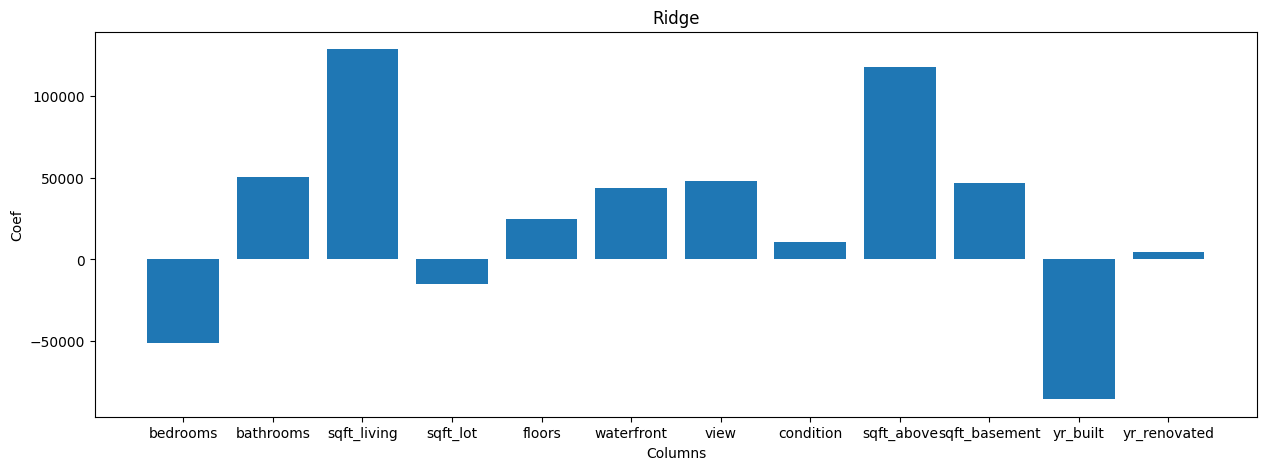

In [42]:
plt.figure(figsize=(15,5))
plt.bar(x.columns , ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

In [48]:
data = pd.DataFrame({"col_name" : x.columns , "Linear Regression" : Lr.coef_ , "Lasso" : La.coef_ , "Ridge" : ri.coef_})

In [49]:
data

,col_name,Linear Regression,Lasso,Ridge
0,bedrooms,-51404.411927,-51403.786922,-51286.554773
1,bathrooms,50470.913776,50467.644848,50452.310934
2,sqft_living,128798.572078,273070.628252,128709.044402
3,sqft_lot,-15227.011545,-15226.354782,-15192.522536
4,floors,24780.651517,24780.953003,24771.510804
5,waterfront,43709.289357,43708.964469,43693.733569
6,view,47826.435021,47826.242345,47844.942839
7,condition,10953.729780,10953.187237,10968.718782
8,sqft_above,117873.583271,-12204.228769,117785.054456
9,sqft_basement,46735.182226,-22784.369898,46715.036565
